In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data.csv")

# Ajouter des colonnes

In [4]:
df.dropna(subset=["tax"], inplace=True)

In [5]:
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,$3.73,20.0
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,$3.70,20.0
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,$9.24,20.0
7,8,03/08/2021,Codi,Feasley,cfeasley7@ed.gov,Male,26.190.191.249,France,$3.01,20.0
8,9,03/09/2021,Waylon,Heersema,wheersema8@tumblr.com,Male,63.242.174.112,Canada,$3.70,20.0
...,...,...,...,...,...,...,...,...,...,...
991,992,03/07/2021,Elihu,Crush,ecrushrj@berkeley.edu,Male,174.38.173.53,Morocco,$5.05,20.0
994,995,03/17/2021,Carolyne,Bruntjen,cbruntjenrm@reference.com,Female,7.29.168.78,France,$5.68,20.0
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,NaN,$4.59,20.0
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,$7.54,20.0


In [6]:
df.price_paid = df.price_paid.apply(lambda x: x.replace("$", ""))
df.price_paid = df.price_paid.astype(float)
df.dtypes

id              int64
date           object
first_name     object
last_name      object
email          object
gender         object
ip_address     object
country        object
price_paid    float64
tax           float64
dtype: object

In [7]:
df["price_total"] = df["price_paid"] * (1 - df["tax"] / 100)

In [8]:
df

,id,date,first_name,last_name,email,gender,ip_address,country,price_paid,tax,price_total
2,3,03/17/2021,Erl,Kilminster,ekilminster2@etsy.com,Male,213.8.101.145,United States,3.73,20.0,2.984
3,4,03/19/2021,Grata,Brantl,gbrantl3@umn.edu,Female,5.140.237.101,United States,3.70,20.0,2.960
4,5,03/24/2021,Kanya,Beasant,kbeasant4@jigsy.com,Male,106.252.162.233,Morocco,9.24,20.0,7.392
7,8,03/08/2021,Codi,Feasley,cfeasley7@ed.gov,Male,26.190.191.249,France,3.01,20.0,2.408
8,9,03/09/2021,Waylon,Heersema,wheersema8@tumblr.com,Male,63.242.174.112,Canada,3.70,20.0,2.960
...,...,...,...,...,...,...,...,...,...,...,...
991,992,03/07/2021,Elihu,Crush,ecrushrj@berkeley.edu,Male,174.38.173.53,Morocco,5.05,20.0,4.040
994,995,03/17/2021,Carolyne,Bruntjen,cbruntjenrm@reference.com,Female,7.29.168.78,France,5.68,20.0,4.544
996,997,03/17/2021,Ame,Rastall,arastallro@toplist.cz,Female,188.219.12.109,NaN,4.59,20.0,3.672
997,998,03/13/2021,Betty,Stickels,bstickelsrp@cloudflare.com,Male,199.80.60.87,United States,7.54,20.0,6.032


In [9]:
df.drop(["first_name", "last_name", "email", "ip_address", "id"], axis=1, inplace=True)
df

,date,gender,country,price_paid,tax,price_total
2,03/17/2021,Male,United States,3.73,20.0,2.984
3,03/19/2021,Female,United States,3.70,20.0,2.960
4,03/24/2021,Male,Morocco,9.24,20.0,7.392
7,03/08/2021,Male,France,3.01,20.0,2.408
8,03/09/2021,Male,Canada,3.70,20.0,2.960
...,...,...,...,...,...,...
991,03/07/2021,Male,Morocco,5.05,20.0,4.040
994,03/17/2021,Female,France,5.68,20.0,4.544
996,03/17/2021,Female,NaN,4.59,20.0,3.672
997,03/13/2021,Male,United States,7.54,20.0,6.032


# Analyser des données

<AxesSubplot:xlabel='country'>

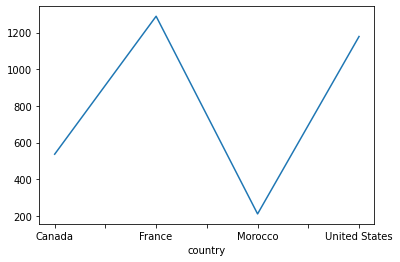

In [13]:
df.groupby("country")["price_total"].sum().plot()

<AxesSubplot:xlabel='country'>

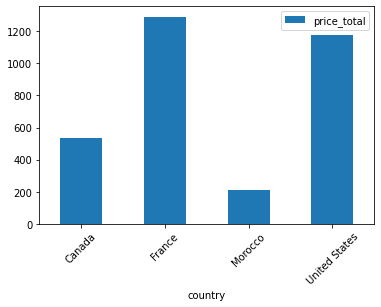

In [72]:
df.groupby("country")["price_paid"].sum().plot.bar(rot=45, legend=True)

<AxesSubplot:ylabel='gender'>

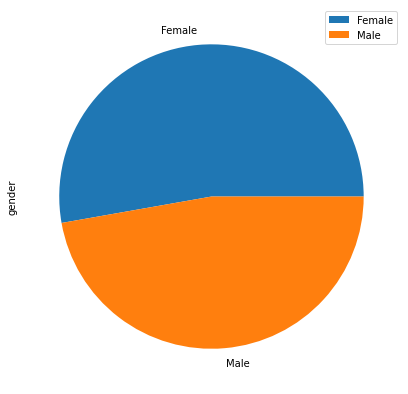

In [52]:
df["gender"].value_counts(normalize=True).plot.pie(legend=True, figsize=(7, 7))